<a href="https://colab.research.google.com/github/Caroline-Camargo/TrabalhosEngenhariaDeSoftwareII/blob/main/Padr%C3%A3o_de_Projeto_Composite_Engenharia_de_Software_II_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Disciplina**: Engenharia de Software II

**Nome**: Caroline Souza Camargo e Yasmin Souza Camargo

**Link**: https://colab.research.google.com/drive/1MY0YPOMOdGMTKdRKTEiD2ZMiuh_HIQb1?usp=sharing

# Padrão Composite

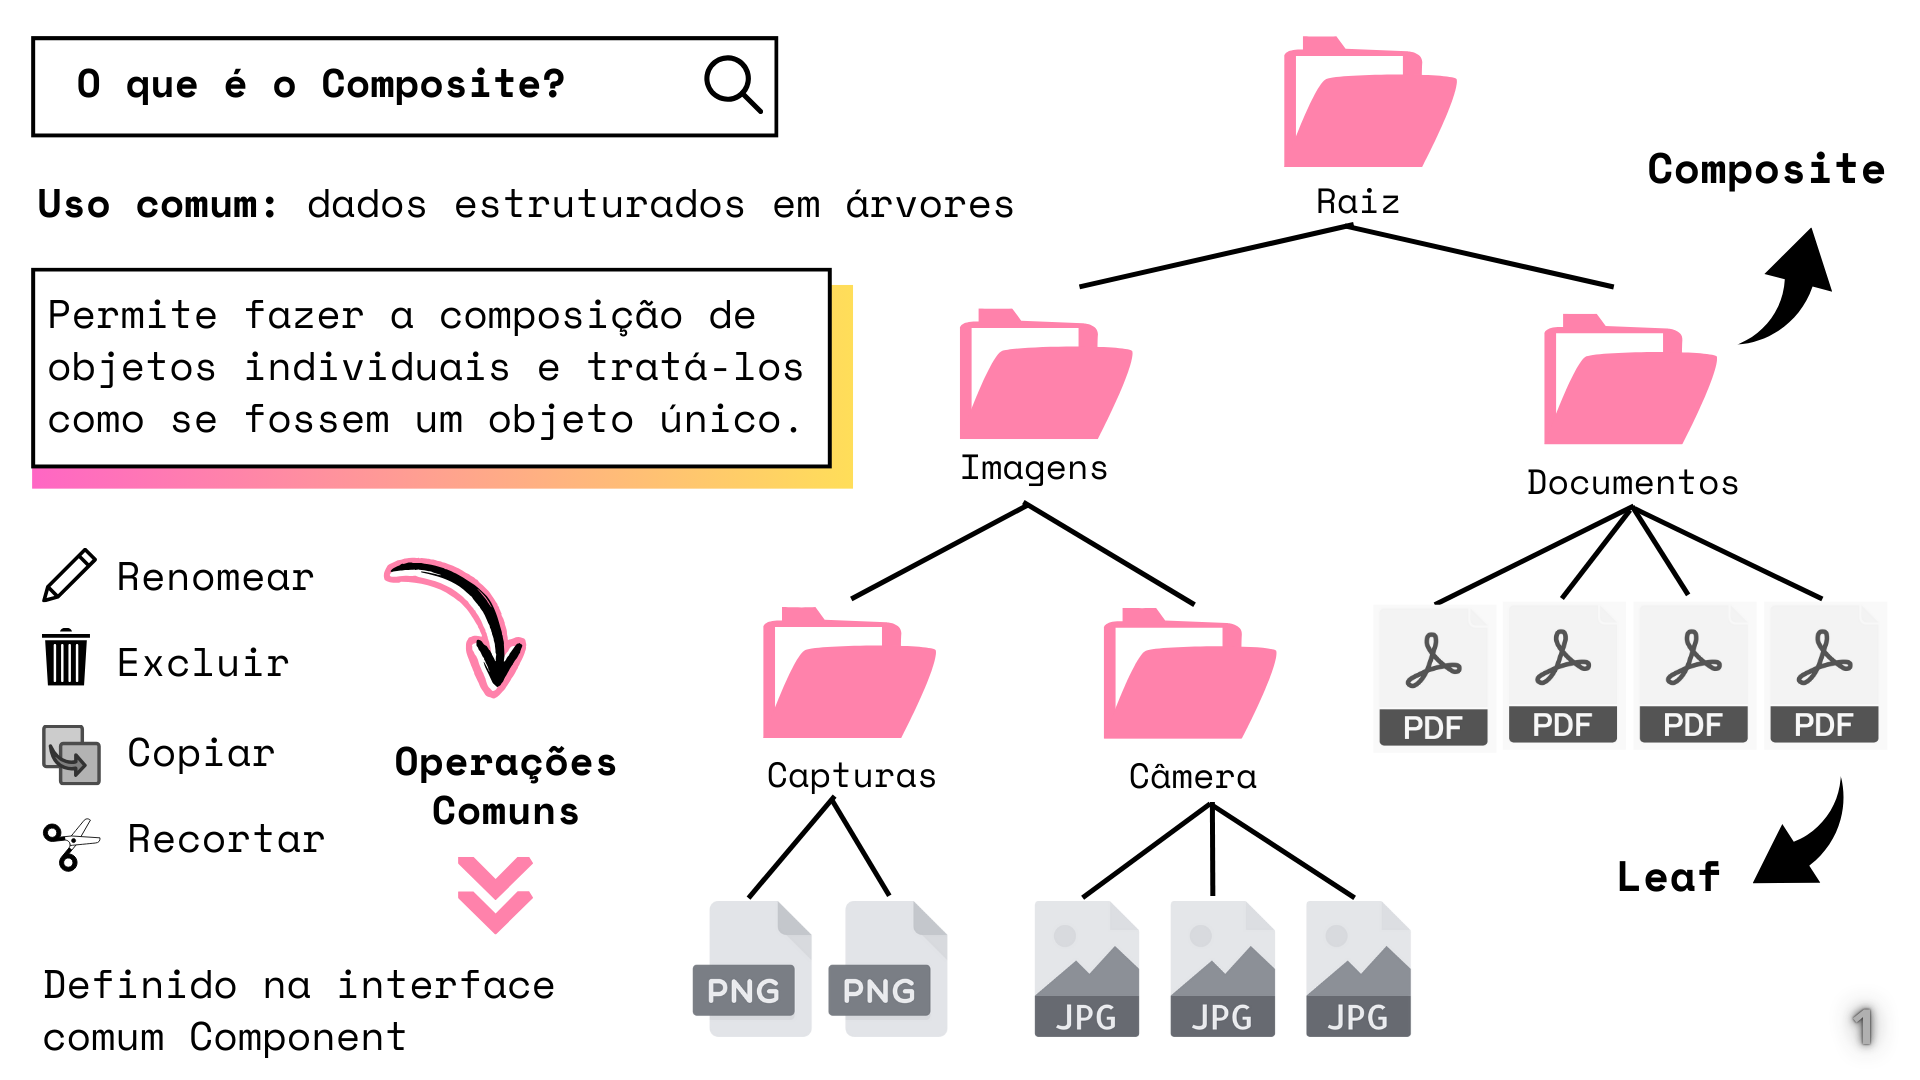

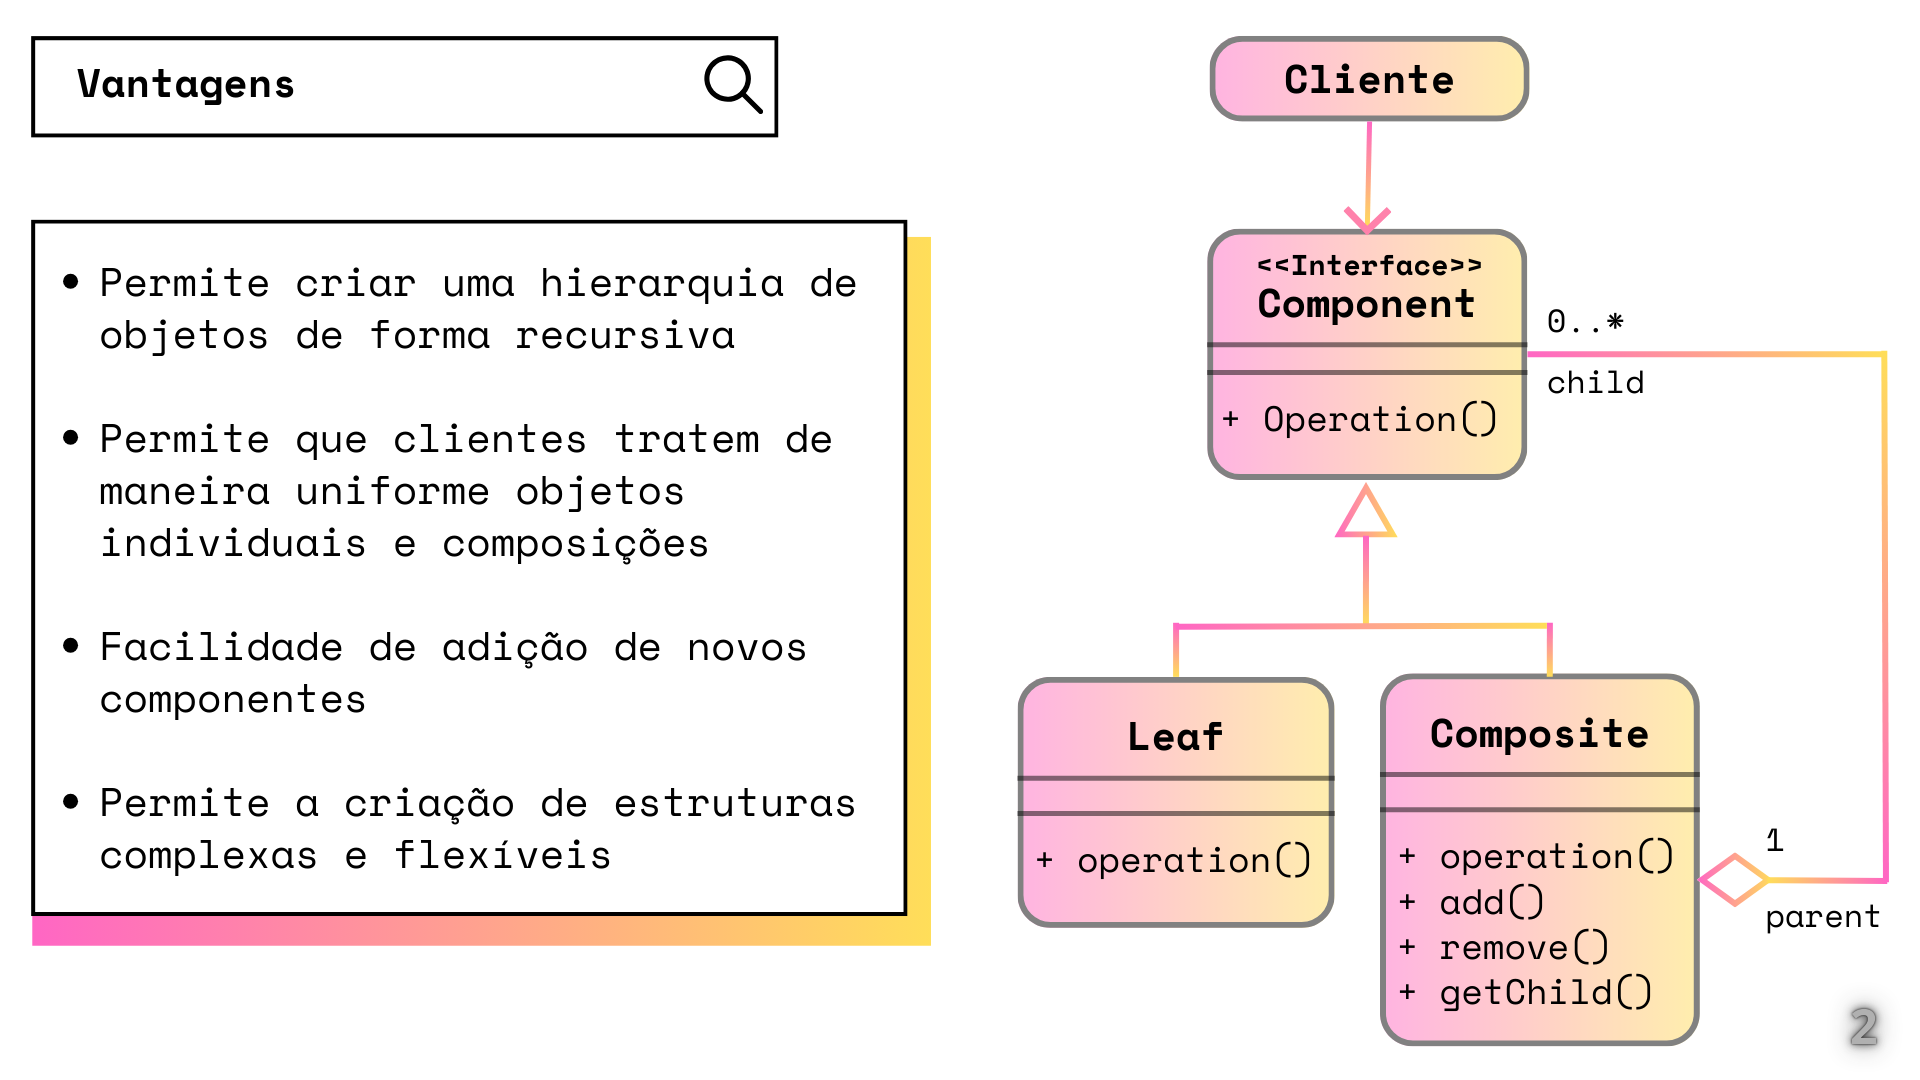

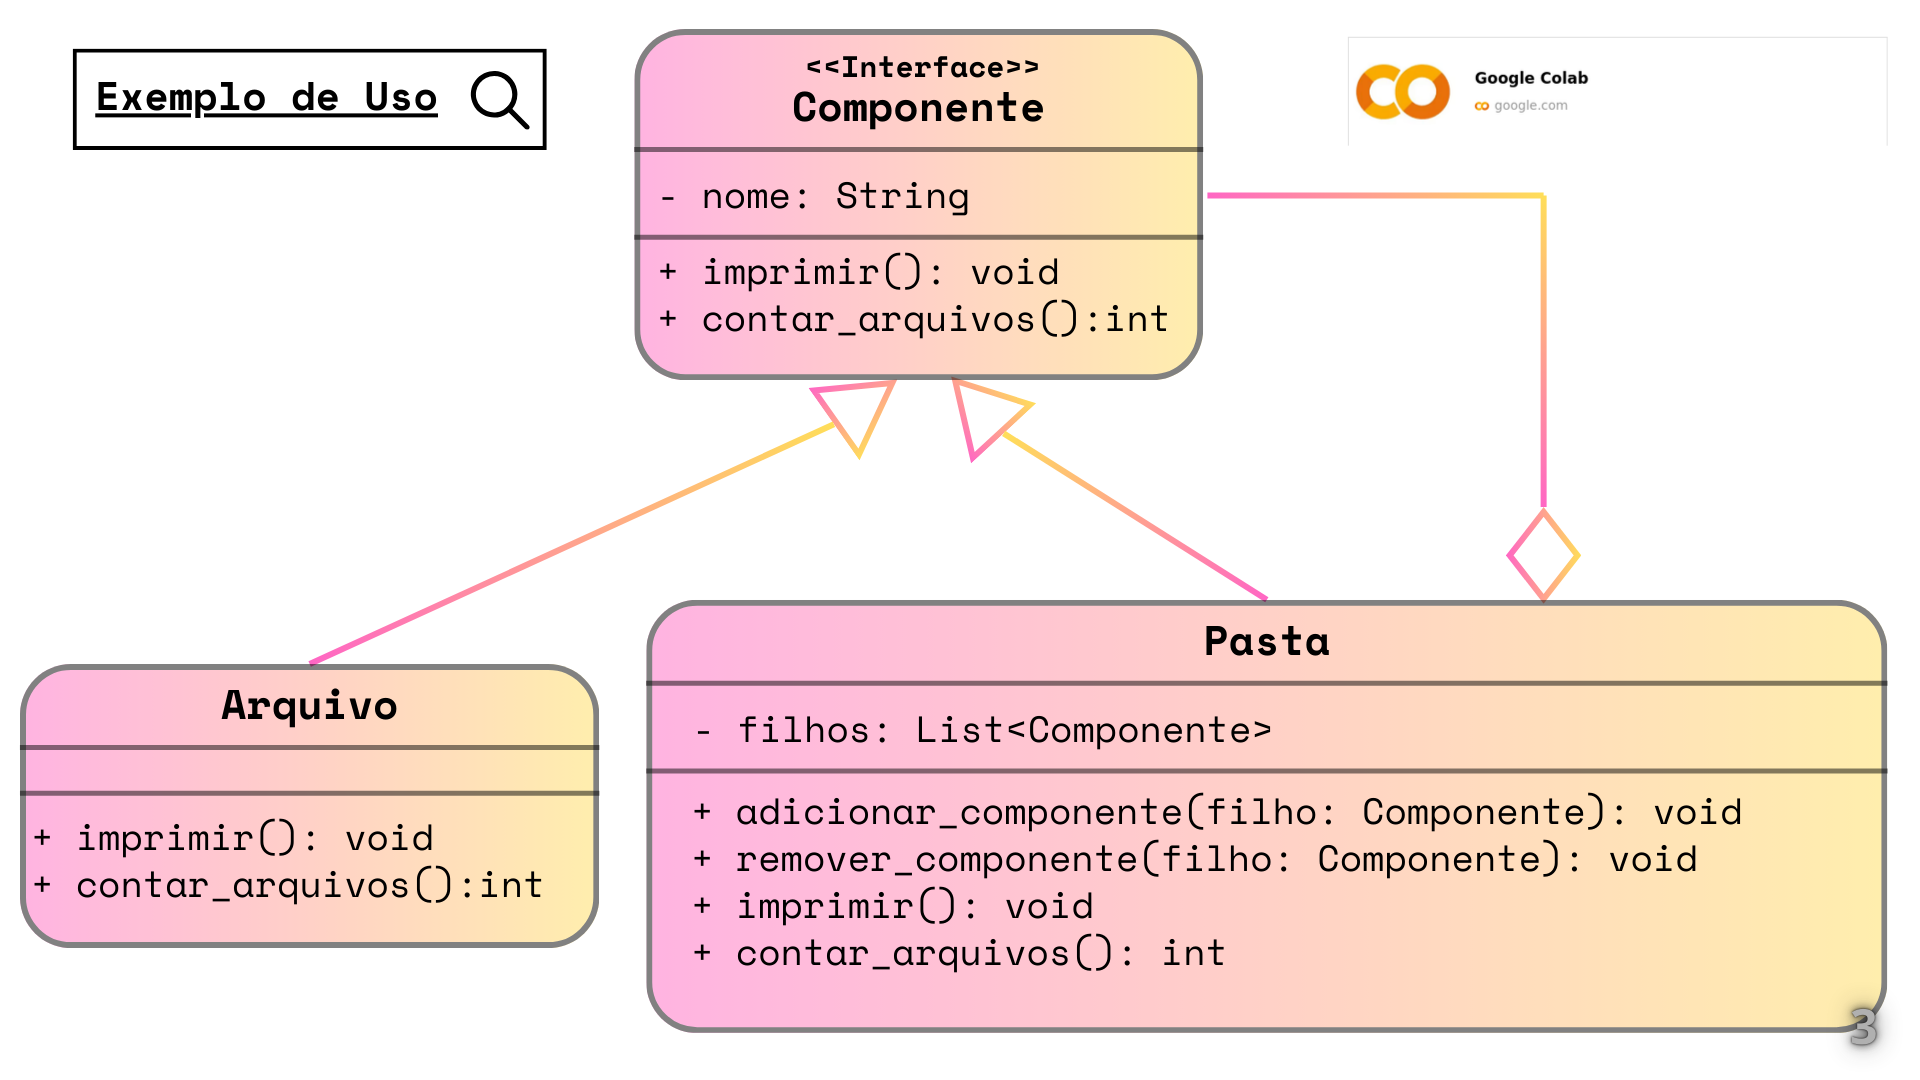

# Exemplo Prático

In [ ]:
from abc import ABC, abstractmethod # Importa da biblioteca utilizada para definir classes abstratas e métodos abstratos

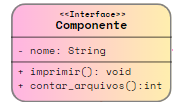

In [ ]:
# Componente base para arquivos e pastas (Interface)
class Componente(ABC):
    def __init__(self, nome):
        self.nome = nome

    @abstractmethod
    def imprimir(self, nivel=0):  # Método abstrato para imprimir arquivos
        pass

    @abstractmethod
    def contar_arquivos(self):  # Método abstrato para contar arquivos
        pass

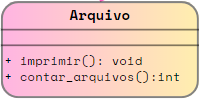

In [ ]:
# Arquivo (folha da árvore)
class Arquivo(Componente):
    def imprimir(self, nivel=0):
        print("- " * nivel + self.nome)

    def contar_arquivos(self):  # Método para contar arquivos, retorna 1 para cada arquivo
        return 1

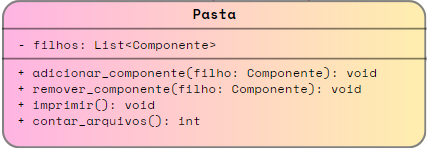

In [ ]:
# Pasta (componente composto)
class Pasta(Componente):
    def __init__(self, nome):
        super().__init__(nome)
        self.filhos = []  # Lista para armazenar componentes (arquivos ou pastas)

    def imprimir(self, nivel=0):
      print("- " * nivel + self.nome)  # Imprime o nome da pasta
      for filho in self.filhos:
          filho.imprimir(nivel + 1)  # Imprime todos os componentes na pasta

    def contar_arquivos(self):  # Conta arquivos, percorre todos os componentes na pasta
        total = 0
        for filho in self.filhos:
            total += filho.contar_arquivos()  # Conta arquivos recursivamente
        return total

    def adicionar_componente(self, filho):
        self.filhos.append(filho)  # Adiciona um componente à pasta

    def remover_componente(self, filho):
        self.filhos.remove(filho)  # Remove um componente da pasta

In [ ]:
# Criando uma estrutura de arquivos e pastas
raiz = Pasta("Raiz")  # Pasta principal (raiz) da estrutura
imagens = Pasta("Imagens")  # Pasta para armazenar imagens
documentos = Pasta("Documentos")  # Pasta para armazenar documentos
documento_pdf = Pasta("PDF")  # Subpasta para documentos PDF
documento_txt = Pasta("TXT")  # Subpasta para documentos TXT

# Arquivos folha
texto1 = Arquivo("Texto1.txt")  # Arquivo de texto
texto2 = Arquivo("Texto2.txt")  # Outro arquivo de texto
texto3 = Arquivo("Texto3.pdf")  # Arquivo PDF
foto1 = Arquivo("Foto1.jpg")  # Arquivo de imagem

# Adicionando pastas e arquivos à estrutura
raiz.adicionar_componente(documentos)  # Adiciona a pasta de documentos à raiz
raiz.adicionar_componente(imagens)  # Adiciona a pasta de imagens à raiz
imagens.adicionar_componente(foto1)  # Adiciona a foto1.jpg à pasta de imagens

documento_txt.adicionar_componente(texto1)  # Adiciona Texto1.txt à subpasta TXT
documento_txt.adicionar_componente(texto2)  # Adiciona Texto2.txt à subpasta TXT
documento_pdf.adicionar_componente(texto3)  # Adiciona Texto3.pdf à subpasta PDF

documentos.adicionar_componente(documento_pdf)  # Adiciona a subpasta PDF à pasta de documentos
documentos.adicionar_componente(documento_txt)  # Adiciona a subpasta TXT à pasta de documentos

raiz.imprimir()  # Imprime a estrutura hierárquica da raiz

print("\nNúmero total de arquivos:", raiz.contar_arquivos())  # Conta e imprime o número total de arquivos
print("Número de arquivos na pasta Documentos:", documentos.contar_arquivos())
print("Número de arquivos da subpasta TXT:", documento_txt.contar_arquivos())
print("Número de arquivos na pasta Imagens:", imagens.contar_arquivos())

Raiz
- Documentos
- - PDF
- - - Texto3.pdf
- - TXT
- - - Texto1.txt
- - - Texto2.txt
- Imagens
- - Foto1.jpg

Número total de arquivos: 4
Número de arquivos na pasta Documentos: 3
Número de arquivos da subpasta TXT: 2
Número de arquivos na pasta Imagens: 1


In [ ]:
documentos.remover_componente(documento_pdf) # Remove a pasta de documentos PDF
documento_txt.remover_componente(texto1)  # Remove um Arquivo de texto
raiz.imprimir()  # Imprime novamente a estrutura hierárquica da raiz após a remoção
print("\nNúmero de arquivos após remoção:", raiz.contar_arquivos())  # Conta e imprime o número total de arquivos após a remoção

Raiz
- Documentos
- - TXT
- - - Texto2.txt
- Imagens
- - Foto1.jpg

Número de arquivos após remoção: 2
